<a href="https://colab.research.google.com/github/Sakshithreddy2004/LMS/blob/main/G_1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
file_path=("/content/drive/MyDrive/Claimants_Data.csv")
pd = pd.read_csv(file_path)
pd.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,1,1,1.0,1.0,0.0,0,8502.60,Moderate,13062.60,1,10398.38,Comprehensive,Minor Offenses
1,2,0,1.0,0.0,1.0,19,2464.30,Moderate,4249.17,1,16550.01,Comprehensive,Clean
2,3,1,0.0,0.0,1.0,69,15647.05,Severe,7401.16,0,18019.31,Third-Party,Minor Offenses
3,4,1,0.0,0.0,1.0,34,9309.79,Moderate,1034.25,0,6826.58,Comprehensive,Minor Offenses
4,5,1,1.0,1.0,0.0,2,663.94,Severe,12654.29,0,18463.96,Third-Party,Minor Offenses


In [3]:
pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100156 entries, 0 to 100155
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CASENUM                 100156 non-null  int64  
 1   ATTORNEY                100156 non-null  int64  
 2   CLMSEX                  100156 non-null  float64
 3   CLMINSUR                100156 non-null  float64
 4   SEATBELT                100156 non-null  float64
 5   CLMAGE                  100156 non-null  int64  
 6   LOSS                    100156 non-null  float64
 7   Accident_Severity       100156 non-null  object 
 8   Claim_Amount_Requested  100156 non-null  float64
 9   Claim_Approval_Status   100156 non-null  int64  
 10  Settlement_Amount       100156 non-null  float64
 11  Policy_Type             100156 non-null  object 
 12  Driving_Record          100156 non-null  object 
dtypes: float64(6), int64(4), object(3)
memory usage: 9.9+ MB


In [13]:
pd.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount
count,100156.000000,100156.000000,100156.000000,100156.000000,100156.000000,100156.000000,100156.000000,100156.000000,100156.000000,100156.000000
mean,50078.500000,0.500369,0.498772,0.499421,0.497324,46.973431,8037.791937,10251.691378,0.498912,9983.682294
std,28912.691118,0.500002,0.500001,0.500002,0.499995,27.401901,4474.928298,5602.169041,0.500001,5528.925468
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,296.550000,563.140000,0.000000,424.580000
25%,25039.750000,0.000000,0.000000,0.000000,0.000000,23.000000,4160.965000,5422.490000,0.000000,5195.572500
50%,50078.500000,1.000000,0.000000,0.000000,0.000000,47.000000,8026.120000,10206.900000,0.000000,9978.405000
75%,75117.250000,1.000000,1.000000,1.000000,1.000000,71.000000,11916.210000,15113.375000,1.000000,14768.805000
max,100156.000000,1.000000,1.000000,1.000000,1.000000,94.000000,15794.800000,19988.390000,1.000000,19566.440000


In [4]:
pd.isnull().sum()

,0
CASENUM,0
ATTORNEY,0
CLMSEX,0
CLMINSUR,0
SEATBELT,0
CLMAGE,0
LOSS,0
Accident_Severity,0
Claim_Amount_Requested,0
Claim_Approval_Status,0


In [6]:
pd.fillna(1).sum()

,0
CASENUM,5015662246
ATTORNEY,50115
CLMSEX,49955.0
CLMINSUR,50020.0
SEATBELT,49810.0
CLMAGE,4704671
LOSS,805033089.2
Accident_Severity,ModerateModerateSevereModerateSevereSevereSeve...
Claim_Amount_Requested,1026768401.67
Claim_Approval_Status,49969


In [12]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [20]:
pd.drop('CASENUM',axis=1,inplace=True)
print(pd)

        ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS  \
0              1     1.0       1.0       0.0       0   8502.60   
1              0     1.0       0.0       1.0      19   2464.30   
2              1     0.0       0.0       1.0      69  15647.05   
3              1     0.0       0.0       1.0      34   9309.79   
4              1     1.0       1.0       0.0       2    663.94   
...          ...     ...       ...       ...     ...       ...   
100151         0     1.0       1.0       1.0      88   4998.43   
100152         0     1.0       1.0       1.0      89   9925.55   
100153         1     0.0       1.0       1.0       4   8314.99   
100154         0     0.0       0.0       0.0      50   3302.68   
100155         0     1.0       1.0       1.0      65    609.55   

       Accident_Severity  Claim_Amount_Requested  Claim_Approval_Status  \
0               Moderate                13062.60                      1   
1               Moderate                 4249.17         

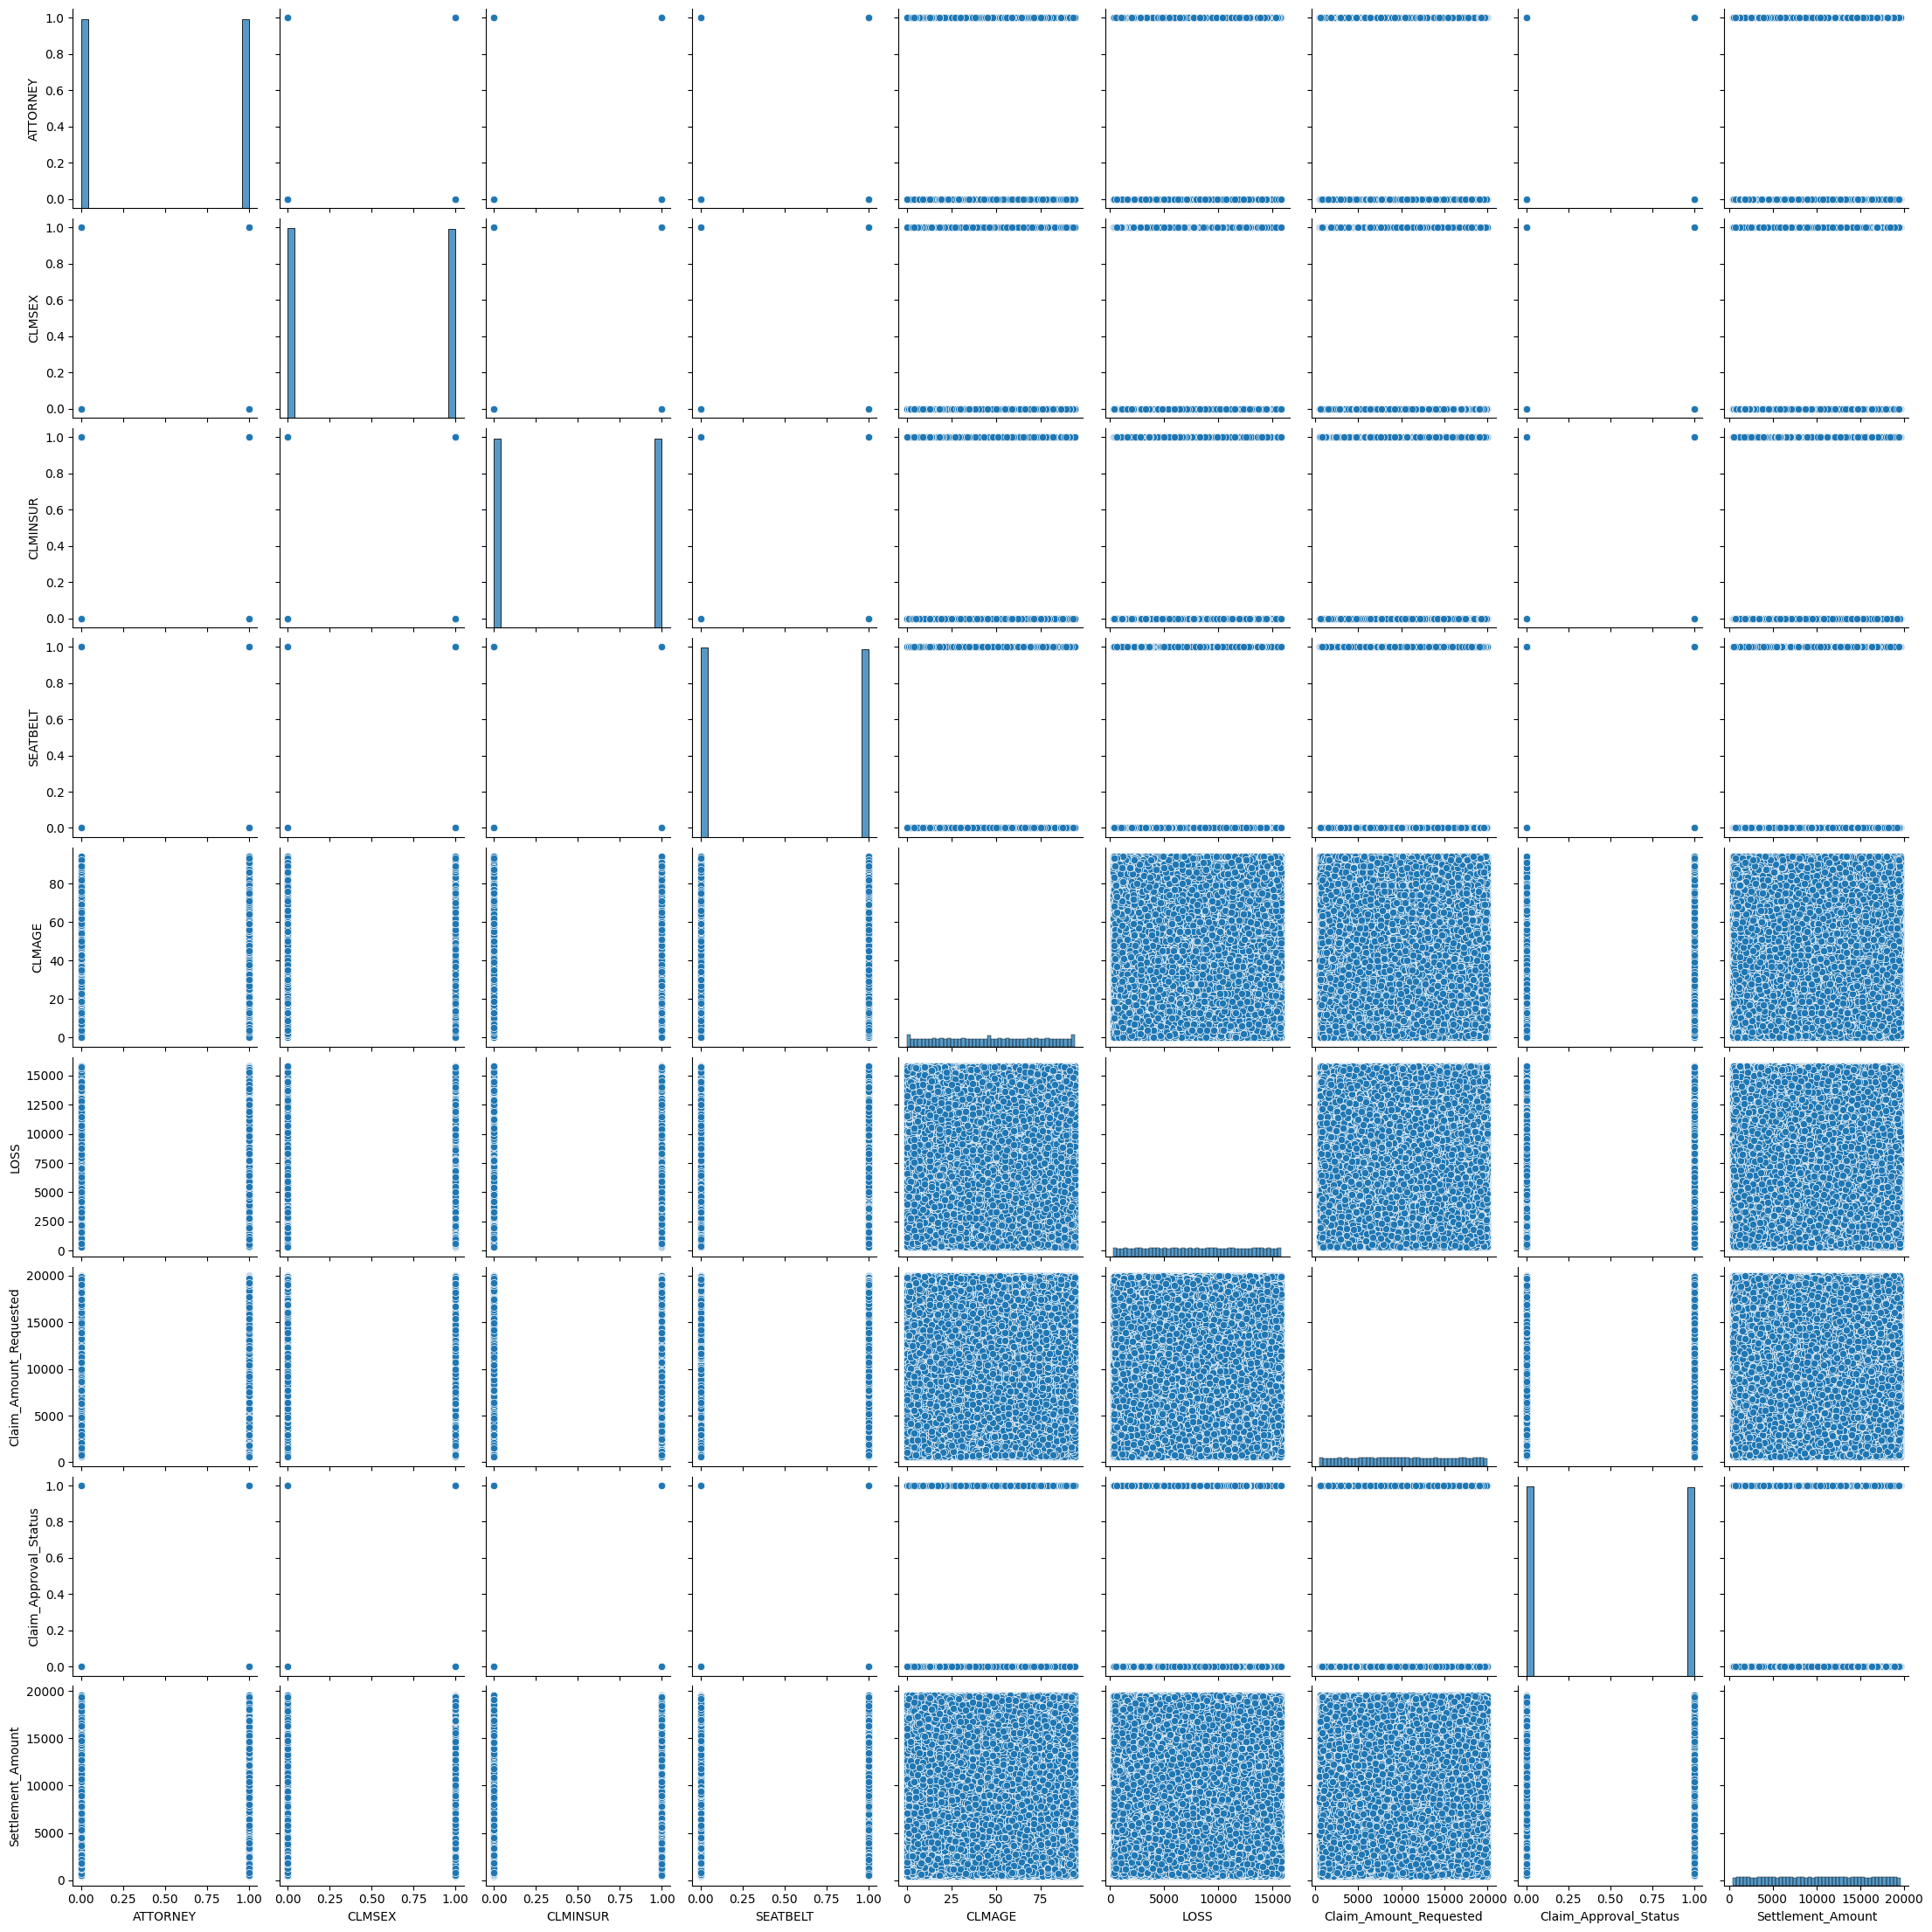

In [22]:
sns.pairplot(pd)

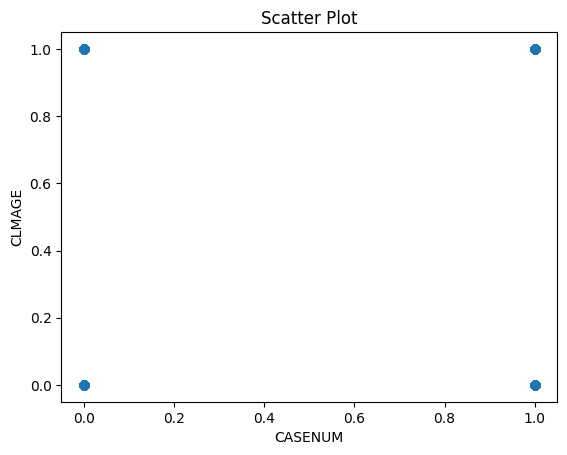

In [27]:
x_column = pd.columns[0]
y_column = pd.columns[1]
plt.scatter(x_column,y_column,data=pd)
plt.title('Scatter Plot')
plt.xlabel('CASENUM')
plt.ylabel('CLMAGE')
plt.show()